# Project Abstract:
This project focuses on image classification using three methods: GLCM-based feature extraction, a custom Convolutional Neural Network (CNN), and Transfer Learning with ResNet50. 

I load only the trained models in this notebook
The implementations are enclosed in the other folders
Just to be clear I create train and test sets by setting the seed for train_test_split to be 42. This guarantees the same test and test set at all times.
#### Dataset: CIFAR-10 dataset.

In [1]:
import tensorflow as tf
import cv2
import os
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from Part3TransferLearning.utils import load_dataset

dataset_path = os.path.join("dataset")
images, labels, encoder = load_dataset(dataset_path, as_rgb=True)
images = images.astype("float32") / 255.0


Loading truck: 100%|█████████████████████████████████████████████████████████████| 6000/6000 [00:04<00:00, 1310.95it/s]


In [2]:

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.1, stratify=labels, random_state=42
)

def evaluate_model(name, y_true, y_pred):
    print(f"\n Evaluation Report for: {name}")
    print(classification_report(y_true, y_pred, target_names=encoder.classes_))
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


## Part 1: GLCM
Implemented GLCM-based feature extraction for image classification. Extracted texture features, trained Random Forest and SVM classifiers, and evaluated performance with classification metrics.
This is highly inaccurate due to lack of textural difference between various classes.

In [6]:
from Part1GLCM.features.glcm_features import extract_features_from_dataset

X_train1, X_test1, y_train1, y_test1 = train_test_split(
    images, labels, test_size=0.1, random_state=42, stratify=labels
)

gray_images = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in X_test1]
features = extract_features_from_dataset(gray_images)


Extracting GLCM features: 100%|███████████████████████████████████████████████████| 6000/6000 [00:37<00:00, 159.85it/s]


#### Random Forest


 Evaluation Report for: Random Forest
              precision    recall  f1-score   support

    airplane       0.11      0.12      0.11       600
  automobile       0.00      0.00      0.00       600
        bird       0.08      0.01      0.01       600
         cat       0.00      0.00      0.00       600
        deer       0.11      0.97      0.20       600
         dog       0.00      0.00      0.00       600
        frog       0.00      0.00      0.00       600
       horse       0.00      0.00      0.00       600
        ship       0.00      0.00      0.00       600
       truck       0.00      0.00      0.00       600

    accuracy                           0.11      6000
   macro avg       0.03      0.11      0.03      6000
weighted avg       0.03      0.11      0.03      6000



C:\Users\Vaasav Sharma\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vaasav Sharma\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vaasav Sharma\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

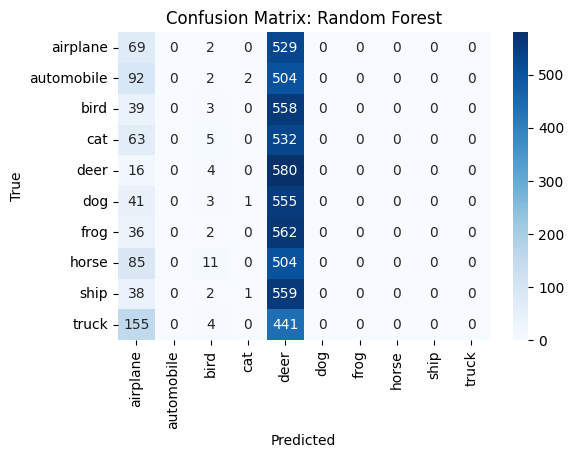

In [7]:
model_path = "Part1GLCM/trained_models/random_forest_glcm.joblib"
model = joblib.load(model_path)

y_pred = model.predict(features)

evaluate_model("Random Forest", y_test1, y_pred)

#### SVM


 Evaluation Report for: Random Forest: 
              precision    recall  f1-score   support

    airplane       0.10      1.00      0.18       600
  automobile       0.00      0.00      0.00       600
        bird       0.00      0.00      0.00       600
         cat       0.00      0.00      0.00       600
        deer       0.00      0.00      0.00       600
         dog       0.00      0.00      0.00       600
        frog       0.00      0.00      0.00       600
       horse       0.00      0.00      0.00       600
        ship       0.00      0.00      0.00       600
       truck       0.00      0.00      0.00       600

    accuracy                           0.10      6000
   macro avg       0.01      0.10      0.02      6000
weighted avg       0.01      0.10      0.02      6000



C:\Users\Vaasav Sharma\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vaasav Sharma\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Vaasav Sharma\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

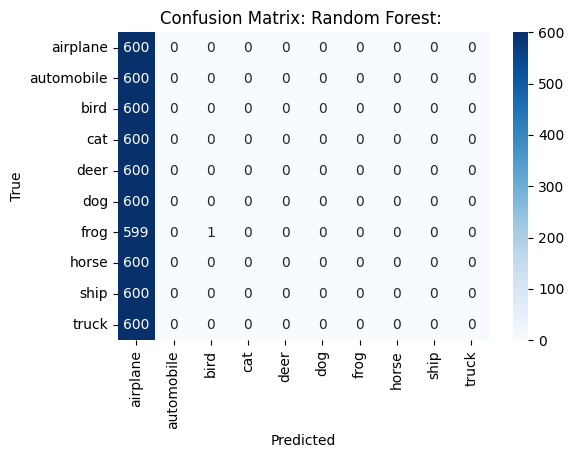

In [9]:
model_path = "Part1GLCM/trained_models/svm_glcm.joblib"
model = joblib.load(model_path)

y_pred = model.predict(features)

evaluate_model("SVM: ",y_test1, y_pred)

## Part 2: CNN from Scratch
Built a CNN from scratch for CIFAR-10 classification. Evaluated model performance and compared results with Part 1 using various metrics. Works best among all three.

C:\Users\Vaasav Sharma\AppData\Roaming\Python\Python312\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 126 variables whereas the saved optimizer has 250 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step

 Evaluation Report for: Custom CNN
              precision    recall  f1-score   support

    airplane       0.82      0.84      0.83       600
  automobile       0.98      0.82      0.89       600
        bird       0.69      0.84      0.76       600
         cat       0.73      0.68      0.70       600
        deer       0.86      0.74      0.80       600
         dog       0.87      0.62      0.72       600
        frog       0.84      0.87      0.85       600
       horse       0.80      0.92      0.86       600
        ship       0.77      0.96      0.85       600
       truck       0.88      0.88      0.88       600

    accuracy                           0.82      6000
   macro avg       0.82      0.82      0.82      6000
weighted avg       0.82      0.82      0.82      6000



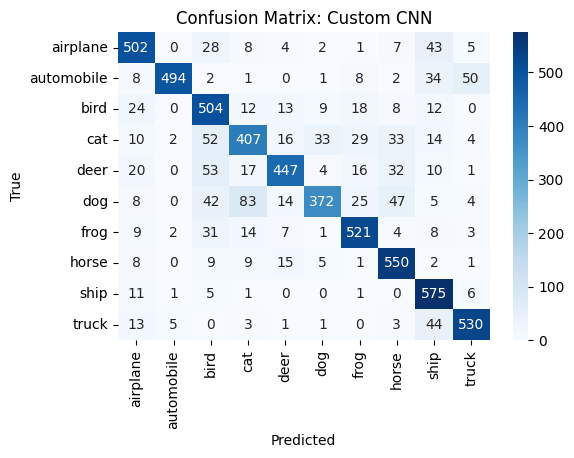

In [10]:
from Part2CNN.blocks.space_to_depth import space_to_depth_x2
from Part2CNN.blocks.hard_swish import HardSwish
from Part2CNN.blocks.blur_pool import BlurPool

X_test_resized = tf.image.resize(X_test, [32, 32]).numpy()
cnn_model_path = os.path.join("Part2CNN", "tresnet_cifar10_full_model.keras")

cnn_model = load_model(
    cnn_model_path,
    custom_objects={
        "HardSwish": HardSwish,
        "space_to_depth_x2": space_to_depth_x2,
        "BlurPool": BlurPool  
    }
)

y_pred_cnn = np.argmax(cnn_model.predict(X_test_resized), axis=1)
evaluate_model("Custom CNN", y_test, y_pred_cnn)

## Part 3: Transfer Learning
Used MobileNetV2 for transfer learning, fine-tuning the model on CIFAR-10 data. Applied data augmentation and saved the best model based on validation accuracy.

188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step

 Evaluation Report for: Transfer Learning (ResNet50)
              precision    recall  f1-score   support

    airplane       0.74      0.63      0.68       600
  automobile       0.73      0.82      0.78       600
        bird       0.58      0.52      0.55       600
         cat       0.56      0.47      0.51       600
        deer       0.58      0.56      0.57       600
         dog       0.64      0.56      0.60       600
        frog       0.59      0.72      0.65       600
       horse       0.64      0.72      0.68       600
        ship       0.72      0.77      0.74       600
       truck       0.74      0.78      0.76       600

    accuracy                           0.66      6000
   macro avg       0.65      0.66      0.65      6000
weighted avg       0.65      0.66      0.65      6000



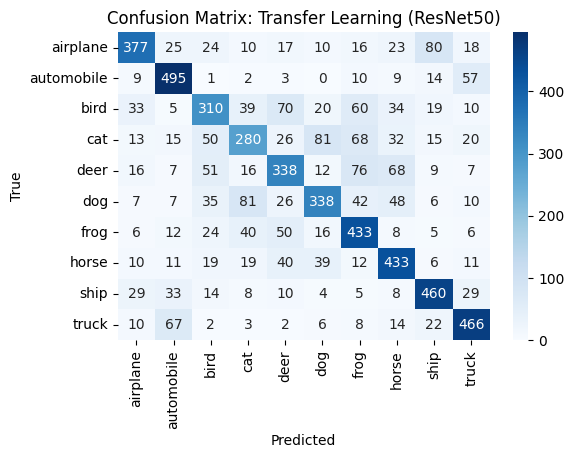

In [11]:
tl_model_path = os.path.join("Part3TransferLearning", "trained_models", "MobileNetV2_transfer_finetuned.keras")
tl_model = load_model(tl_model_path)
y_pred_tl = np.argmax(tl_model.predict(X_test), axis=1)
evaluate_model("Transfer Learning (ResNet50)", y_test, y_pred_tl)